## <span style="color:red">  *STROKE PREDICTION* </span>

### <span style="color:#a13555">  *PROJECT MEMBER* </span>
#### <span style="color:#a13555"> 1. *ASHISH KUMAR (B20EE011)*  </span>
#### <span style="color:#a13555"> 2. *KRISHNA MOHAN (B20EE031)* </span>
#### <span style="color:#a13555"> 3. *Shailesh Yadav (B20EE062)* </span>

##### *BRIEF OVERVIEW*



*<span style="text-transform: uppercase;">Stroke is the 2nd leading cause of death globally, responsible for approximately 11% of
total deaths. predict whether a patient is likely to get a
stroke based on the input parameters like gender, age, various diseases, and smoking
status.</span>*
</BR>

#### *CONVERTING DATA INTO READABLE FORMAT*

In [90]:
import numpy as np


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [91]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [92]:
print(f'no of rows : {data.shape[0]}')
print(f'no of columns : {data.shape[1]}')

no of rows : 5110
no of columns : 12


*CHECKING NULL VALUES*

In [93]:
print(data.isnull().sum())
print(f'data-shape: {data.shape}')

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
data-shape: (5110, 12)


*SINCE BMI CONTAIN SOME NAN VALUES SO REPLACING THE NAN VALUE WITH MEAN OF BMI FEATURE*

In [94]:
import math


def average(data_,feature_):
    sum_=0
    count=0
    #feature_='bmi'
    for c in data_[feature_]:
        if(not math.isnan(c)):
            sum_=sum_+c
            count+=1
    return sum_ /count   

def fillna(data,feature):
    for i in range(len(data[feature])):
        if(math.isnan(data[feature][i])) :
            data[feature][i]=average(data,feature)


fillna(data,'bmi')

print(data.isnull().sum())


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


(array([2.115e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.994e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

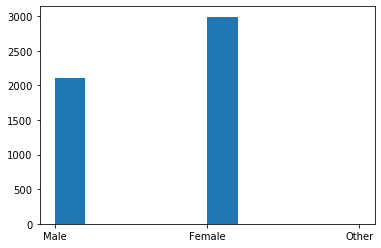

In [95]:
plt.hist(data.gender)

(array([2925.,    0.,  819.,    0.,    0.,  657.,    0.,  687.,    0.,
          22.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

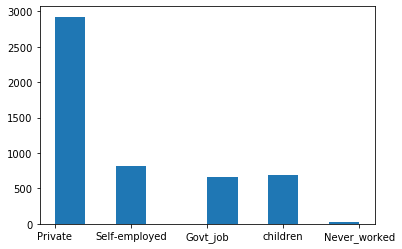

In [96]:
plt.hist(data['work_type'])

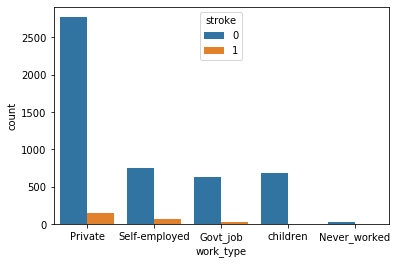

In [97]:
sns.countplot(data=data,x='work_type',hue='stroke')

*FROM ABOVE GRAPH WE CAN OBSERVE THAT A LARGE NO. OF PEOPLE WORK IN PRIVATE SECTOR. AND THE PEOPLE WORKING IN PRIVATE HAVE HIGHER CHANCE OF STROKES*

(array([2596.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2514.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

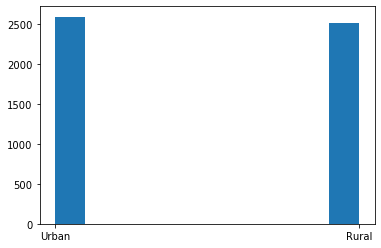

In [98]:
plt.hist(data.Residence_type)

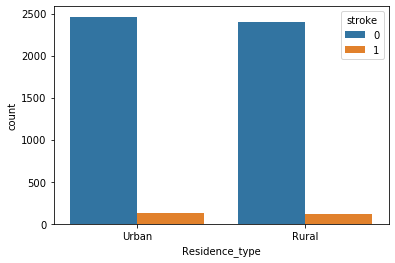

In [99]:
sns.countplot(data=data,x='Residence_type',hue='stroke')

*FROM THE ABOVE GRAPH WE INFER THAT ALMOST SAME NUMBER OF PEOPLE IN URBAN AND RULAR. ALSO PEPOPLE HAVING STROKES ARE ALMOST SAME*

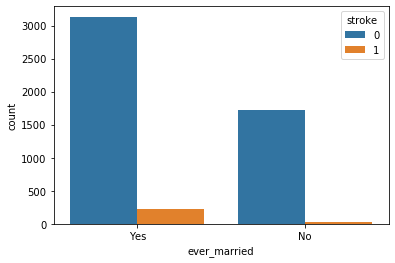

In [100]:
sns.countplot(data=data,x='ever_married',hue='stroke')

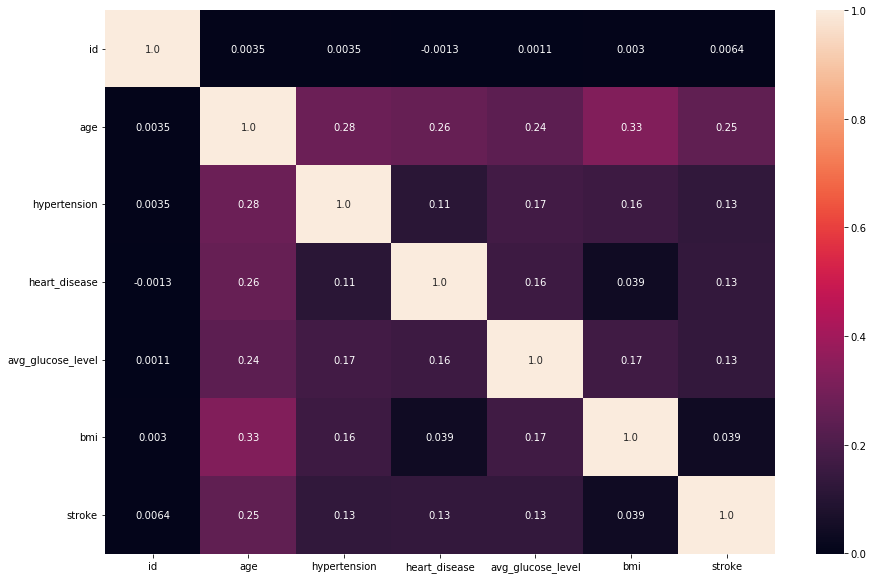

In [101]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')

*FROM ABOVE CORELATION MATRIX WE CAN SEE THAT BMI HAS VERY LESS ASSOCIATED WITH THE STROKE. ID IS SEEMS NOT USEFUL COLUMN.LIGHTER IS COLOR MORE IT IS CORELATED*

0    4861
1     249
Name: stroke, dtype: int64


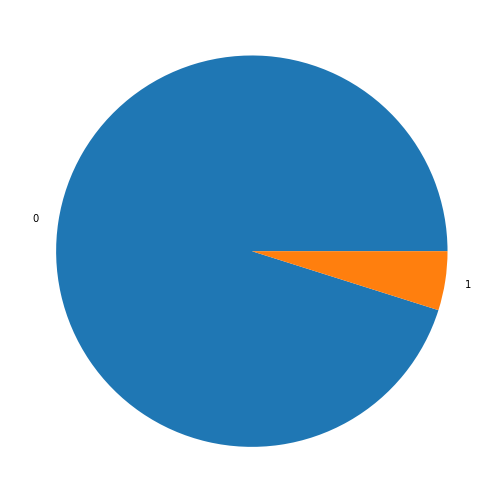

In [102]:
count=data['stroke'].value_counts()
label=['0','1']
plt.figure(figsize=(13,9))
plt.pie(count,labels=label)
print(count)

*SINCE DATA SEEMS TO BE IMBALANCE SO WE NEED TO HANDL THAT.*

*DIFFERENT WAY TO HANDLE IMBALANCE DATA-:*<BR>
1. OVERSAMPLING <BR>
2. UNDERSAMPLING <BR>
3. CHANGE PEERFORMANCE METRIC <BR>
4. USE OF TREE BASED ALGORITHM




* DROPPING THE IRRELEVENT COLOUMN 

In [103]:
data=data.drop(['id'],axis=1)

* *LABELENCODDING THE CATEGORIAL DATA*

In [104]:

data.gender=data.gender.map({'Male':0,'Female':1})
data.Residence_type=data.Residence_type.map({'Urban':0,'Rural':1})
data.smoking_status=data.smoking_status.map({'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':3})
data.ever_married=data.ever_married.map({'Yes':0,'No':1})
data.work_type=data.work_type.map({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,1.0,61.0,0,0,0,1,1,202.21,28.893237,1,1
2,0.0,80.0,0,1,0,0,1,105.92,32.500000,1,1
3,1.0,49.0,0,0,0,0,0,171.23,34.400000,2,1
4,1.0,79.0,1,0,0,1,1,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,80.0,1,0,0,0,0,83.75,28.893237,1,0
5106,1.0,81.0,0,0,0,1,0,125.20,40.000000,1,0
5107,1.0,35.0,0,0,0,1,1,82.99,30.600000,1,0
5108,0.0,51.0,0,0,0,0,1,166.29,25.600000,0,0


*SPLITTING THE DATA INTO TRAIN TEST*

In [105]:

def train_test_split(data):
    shuffled_data=data.sample(frac=1)
    train_size=int(0.7*len(data))
    train=shuffled_data[:train_size]
    test=shuffled_data[train_size:]
    return train,test

train,test=train_test_split(data)  

*DIVIDING DATA INTO FEATURES AND LABEL*

In [106]:
X_train=train.iloc[:,:-1].values
y_train=train.iloc[:,-1:].values
X_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1:]


*IMPLEMENTING RANDOMFOREST FROM SCRATCH*

INITIALIZE THE NODE THRESHOLD, LEFT ,RIGHT, VALUE,FEATURE.<BR>
INITIALIZE THE DECISIONTREE MAX_DEPTH,MIN_SAMPLE_SPLIT,N_FEATS<BR>
DEFINED BEST CRITERIA SPLIT METHOD TO SPLIT THE COLUMN FEATURE<BR>
DEFINDED MAKE_TREE TO CREATE LEFT AND RIGHT CHILD WITH BASE CASE 'depth>=self.max_depth or n_labels==1 or n_sample greater than self.min_sample_split' AND RETURN NODE<BR>
TRAVERSE METHOD IS USED TO TRAVEL LEFT AND RIGHT SUBTREES.<br>
CALCULATE PARENT NODE'S ENTROPY <br>
CALCULATE THE ENTROPY OF EACH INDIVIDUAL NODE IN THE SPLIT AND THE WEIGHTED AVERAGE OF ALL SUB-NODE.<br>
INFORMATION GAIN IS DIFFERENCE BETWEEN A PARENT AND A SUB-NODE<br>






In [107]:
def entropy(y):
   unique, counts = np.unique(y, return_counts=True)
   pb=counts/len(y)
   sum=-1*np.sum([p*np.log2(p) for p in pb if p>0])

   return sum


In [108]:
unique, counts = np.unique(y_train, return_counts=True)

In [109]:
class Node:
    def __init__(self,feature=None,threshold=None,left=None,right=None,value=None):
        self.feature=feature
        self.threshold=threshold
        self.left=left
        self.right=right
        self.value=value

    def isLeafNode(self):
        return self.value is not None


class DecisionTree:
    def __init__(self,min_sample_split=2,max_depth=100,n_feats=None):
        self.min_sample_split=min_sample_split
        self.max_depth=max_depth
        self.n_feats=None

    def most_common_label(self,List):
        List=list(List)
        counter = 0
        num = List[0]
     
        for i in List:
            curr_frequency = List.count(i)
            if(curr_frequency> counter):
                counter = curr_frequency
                num = i
 
        return num


    def traverse(self,x,Node):
        if Node.isLeafNode():
            return Node.value
        if x[Node.feature]<=Node.threshold:
            return self.traverse(x,Node.left)
            
        return self.traverse(x,Node.right)


    def split(self,X_column,split_thresh):
        left_idxs=[]
        for i in range(len(X_column)):
            if X_column[i]<=split_thresh:
                left_idxs.append(i)
        right_idxs=[]
        for j in range(len(X_column)):
            if X_column[j]>split_thresh:
                right_idxs.append(j)
       

        return np.array(left_idxs), np.array(right_idxs)

    def information_gain(self,y,X_column,split_thresh):
        parent_entropy=entropy(y)
        left_idxs,right_idxs=self.split(X_column,split_thresh)
        if( len(left_idxs)==0 or len(right_idxs)==0):
            return 0
        n=len(y)
        nl,nr=len(left_idxs),len(right_idxs)
        el,er=entropy(y[left_idxs]),entropy(y[right_idxs])
        child_entropy=(nl/n)*el + (nr/n)*er
        ig=parent_entropy-child_entropy
        return ig



    def best_criteria(self,X,y,feat_indxs):
        best_gain=-1
        split_idx=None
        split_thres=None
        for feat_idx in feat_indxs:
            X_column=X[:,feat_idx]
            thresholds=np.unique(X_column)
            for threshold in thresholds:
                gain=self.information_gain(y,X_column,threshold)
                if gain>best_gain:
                    best_gain=gain
                    split_idx=feat_idx
                    split_thres=threshold
        return split_idx,split_thres            


    def make_tree(self,x,y,depth=0):
        n_sample,n_feature=x.shape
        n_labels=len(np.unique(y))

        if(depth>=self.max_depth or n_labels==1 or n_sample<self.min_sample_split):
            leaf_value=self.most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs=np.random.choice(n_feature,self.n_feats,replace=False)
        best_feat, best_thresh = self.best_criteria(x, y, feat_idxs)
        left_idxs, right_idxs = self.split(x[:, best_feat], best_thresh)
        left = self.make_tree(x[left_idxs, :], y[left_idxs], depth+1)
        right = self.make_tree(x[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feat, best_thresh, left, right)

    def fit(self,x,y):
        if not self.n_feats:
            self.n_feats=x.shape[1]
        else:
            self.n_feats=min(self.n_feats,x.shape[1])

        self.root=self.make_tree(x,y)

    def predict(self, X):
        return np.array([self.traverse(x, self.root) for x in X])



In [110]:


class RandomForest:
    def __init__(self,n_trees=10,min_sample_spilt=2,max_depth=100,n_feat=None):
        self.n_trees=n_trees
        self.min_sample_split=min_sample_spilt
        self.max_depth=max_depth
        self.n_feat=n_feat
        self.trees=[]
    
    def bootstrap(self,x,y):
        n_sample=x.shape[0]
        index=np.random.choice(n_sample,n_sample,replace=True)
        return x[index],y[index]

    def fit(self,x,y):
        self.trees=[]
        for _ in range(self.n_trees):
            tree=DecisionTree(min_sample_split=self.min_sample_split,max_depth=self.max_depth,n_feats=self.n_feat)
            x_samp,y_samp=self.bootstrap(x,y)
            tree.fit(x_samp,y_samp)
            self.trees.append(tree)

    def predict(self,x):
        tree_preds=np.array([tree.predict(x) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [self.most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)


    def most_common_label(self,List):
        List=list(List)
        counter = 0
        num = List[0]
     
        for i in List:
            curr_frequency = List.count(i)
            if(curr_frequency> counter):
                counter = curr_frequency
                num = i
 
        return num
        


In [111]:
model1=DecisionTree(max_depth=5)
model1.fit(X_train,y_train)
pred1=model1.predict(X_test)

In [112]:
pred1=pred1.reshape(1,-1)[0]
y_test=y_test.values.reshape(1,-1)[0]


In [113]:
def accuracy(pred,y_test):
    return np.sum(pred==y_test)/len(y_test)

In [114]:
accuracy(pred1,y_test)

0.9419439008480104

In [115]:
model=RandomForest(max_depth=20)
model.fit(X_train,y_train)
predict=model.predict(X_test)

In [116]:
predict=predict.reshape(1,-1)[0]
accuracy(predict,y_test)

0.9406392694063926

ALGORITHM<BR>
DEFINE THE CLASS LOGISTICREGRESSION<BR>
INSTANITATE LOGISTICREGRESSION ATTRIBUTE LEARNING_RATE,ITERATIONS,X,Y,BIAS ,WEIGHT AND THRESHOLD.<BR>
DEFINDED METHOD UPDATE_WEIGHT .<BR>
FOR EACH ITERATION IN UPDATE_WEIGHT ,CALCULTE GRADIENT DECENT AND UPDATE WEIGHT<BR>
DEFINING THE METHOD PREDICT  TO GET THE PREDICTED Y ON UPDATED WEIGHT AND BIAS

*IMPLEMENTING LOGISTICREGRESSION FROM SCRATCH*

In [117]:

class LogisticRegression:
    def __init__( self, learning_rate, iterations,X,Y) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
        self.X=X
        self.Y=Y
        self.b=0
        self.m=X.shape[0]
        self.n=X.shape[1]
        self.W=np.zeros(X_train.shape[1])
        self.thres=0.5

    def fit(self):
        self.update_weight()
        return self


    def update_weight(self): 
  
        
        for i in range(self.iterations):  
            A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )      
            tmp = ( A - self.Y.T )
            tmp=tmp.reshape(self.m)           
            dW = np.dot( self.X.T, tmp ) / self.m         
            db = np.sum( tmp ) / self.m 
          
  
            self.W -= self.learning_rate * dW    
            self.b -= self.learning_rate * db
        
        return self 
        
    def predict( self, X ) :
      

        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )
        Y=[]

        for c in Z:
            if c>self.thres:
                Y.append(1)
            else:
                Y.append(0)          
        return np.array(Y)

In [118]:
model_=LogisticRegression(learning_rate=0.1,iterations=100,X=X_train,Y=y_train)
model_.fit()
pred__=model_.predict(X_test)

In [119]:
accuracy(pred__,y_test)

0.9452054794520548

*IMPLEMENT SVM FROM SCRATCH*

In [120]:
class SVM:
    def __init__(self,learning_rate,iteration,lambda_param,X,Y):
        self.learning_rate=learning_rate
        self.iteration=iteration
        self.w=np.zeros(X_train.shape[1])
        self.lambda_param=lambda_param
        self.b=0
        self.X=X
        self.Y=Y
        self.m=X.shape[0]
        self.n=X.shape[1]

    def fit(self):
        y=np.where(self.Y<=0,-1,1)
        for i in range(self.iteration):
            for idx,x in enumerate(self.X):
                condition=y[idx]*(np.dot(x,self.w)-self.b)>=1
                if condition==True:
                    self.w-=self.learning_rate*(2*self.lambda_param*self.w)
                else:
                    self.w-=self.learning_rate*(2*self.lambda_param*self.w)
                    self.b-=self.learning_rate*y[idx]

    def predict(self,X):
        app=np.dot(X,self.w)-self.b
        return np.sign(app)


new_y=np.where(y_train==0,-1,1)
clf=SVM(learning_rate=0.001,iteration=1000,lambda_param=0.01,X=X_train,Y=new_y)
predict2=clf.predict(X_test)


        

        

In [121]:

accuracy(predict2,y_test)

0.9452054794520548

In [122]:
def confusion_matrix(y_test,y_pred):
  classes=np.unique(y_test)
  confusion_matrx=[[0 for i in range(len(classes))] for j in range(len(classes))] 


  for i in range(len(classes)):
    for j in range(len(classes)):
      confusion_matrx[i][j]=sum(y_pred[y_test==classes[i]]==classes[j])
  return confusion_matrx

In [123]:
confusion_matrix(y_test,pred1)

[[1443, 6], [83, 1]]

In [124]:
def compute(y_test,y_pred):
  TP=sum(y_pred[y_test==1]==1)
  FP=sum(y_pred[y_test==0]==1)
  TN=sum(y_pred[y_test==0]==0)
  FN=sum(y_pred[y_test==1]==0)
  return TP,FP,TN,FN

*FOR DECISIONTREE*

In [132]:
compute(y_test,pred1)

(1, 6, 1443, 83)

*FOR RANDOMFOREST*

In [126]:
compute(y_test,predict)

(3, 10, 1439, 81)

*FOR LOGISTICREGRESSION*

In [127]:
compute(y_test,pred__)

(0, 0, 1449, 84)

*FOR SVM*

In [128]:
compute(y_test,predict2)

(0, 0, 1449, 84)